In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
data = sklearn.datasets.fetch_california_housing()

In [3]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [4]:
df = pd.DataFrame(data.data, columns= data.feature_names)

In [5]:
df['Price'] = data.target

In [6]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [37]:
df.iloc[1000]

MedInc           3.384100
HouseAge        29.000000
AveRooms         4.842031
AveBedrms        1.002821
Population    1919.000000
AveOccup         2.706629
Latitude        37.690000
Longitude     -121.760000
Price            1.844000
Name: 1000, dtype: float64

In [7]:
df.shape

(20640, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


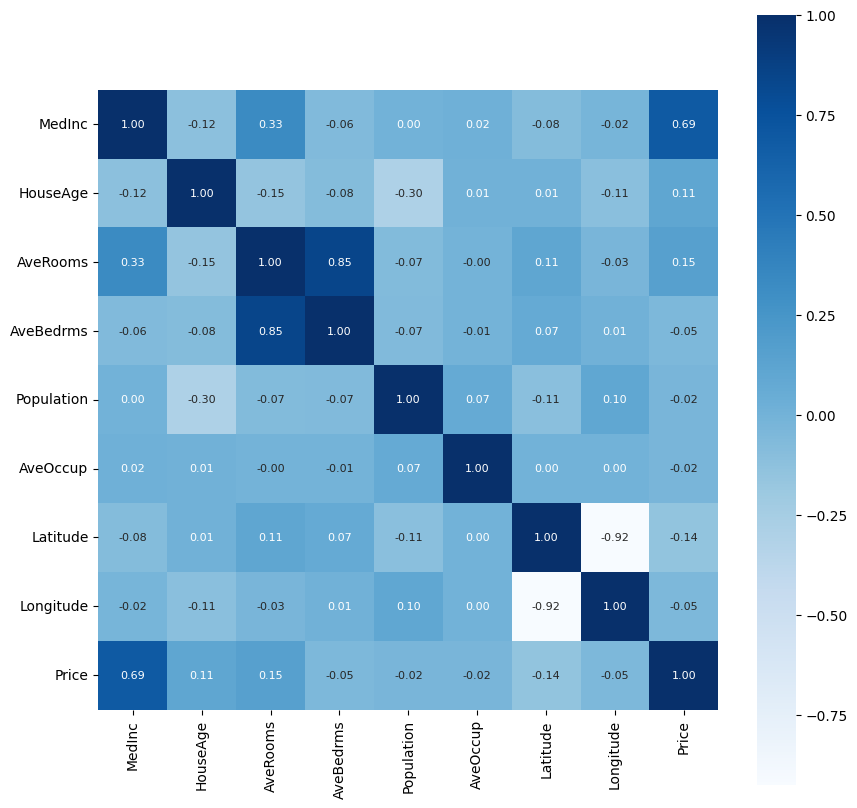

In [11]:
correlation = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.2f', annot = True, annot_kws= {'size': 8}, cmap = 'Blues')
plt.show()

In [12]:
X = df.drop(columns = ['AveBedrms', 'Price'])
y = np.log(df.Price) 

In [13]:
scaler = StandardScaler()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2)

In [15]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(16512, 7) (4128, 7) (16512,) (4128,)


In [17]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
lr_train_pred = lr.predict(X_train_scaled)
lr_test_pred = lr.predict(X_test_scaled)

lr_r2_train_score = r2_score(y_train, lr_train_pred)
lr_mae_train_score = mean_absolute_error(y_train, lr_train_pred)
lr_r2_test_score = r2_score(y_test, lr_test_pred)
lr_mae_test_score = mean_absolute_error(y_test, lr_test_pred)


print ('Linear Regression Training R2 Score:',lr_r2_train_score)
print ('Linear Regression Training MAE Score:',lr_mae_train_score)
print ('Linear Regression Test R2 Score:',lr_r2_test_score)
print ('Linear Regression Test MAE Score:',lr_mae_test_score)

Linear Regression Training R2 Score: 0.6105688957167785
Linear Regression Training MAE Score: 0.27098272849766486
Linear Regression Test R2 Score: 0.601624507065192
Linear Regression Test MAE Score: 0.27366421972988114


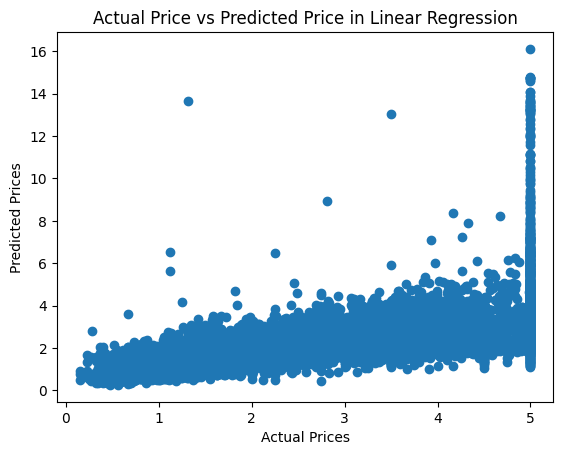

In [19]:
plt.scatter(np.exp(y_train), np.exp(lr_train_pred))
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price in Linear Regression')
plt.show()

In [25]:
xgb_param_grid = {
    'max_depth': [3, 4],
    'min_child_weight': [5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'n_estimators': [150, 200],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [1.0, 2.0]
}

xgb = XGBRegressor(random_state = 42)

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train_scaled, y_train)
best_xgb = xgb_grid.best_estimator_

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


In [26]:
xgb_train_pred = best_xgb.predict(X_train_scaled)
xgb_test_pred = best_xgb.predict(X_test_scaled)

xgb_mae_train_score = mean_absolute_error(y_train, xgb_train_pred)
xgb_mae_test_score = mean_absolute_error(y_test, xgb_test_pred)
xgb_r2_train_score  = r2_score(y_train, xgb_train_pred )
xgb_r2_test_score  = r2_score(y_test, xgb_test_pred)

print ('XGB Training R2 Score:',xgb_r2_train_score)
print ('XGB Training MAE Score:',xgb_mae_train_score)
print ('XGB Test R2 Score:',xgb_r2_test_score)
print ('XGB Test MAE Score:',xgb_mae_test_score)

XGB Training R2 Score: 0.8709109593905912
XGB Training MAE Score: 0.14859595519817187
XGB Test R2 Score: 0.8348304120537531
XGB Test MAE Score: 0.15985622823456938


In [31]:
# Convert predictions back to price scale
lr_train_price = np.expm1(lr_train_pred)
lr_test_price  = np.expm1(lr_test_pred)
xgb_train_price = np.expm1(xgb_train_pred)
xgb_test_price  = np.expm1(xgb_test_pred)

# Convert y_true back as well
y_train_price = np.expm1(y_train)
y_test_price  = np.expm1(y_test)

# Recompute scores on actual price scale
lr_r2_train_score = r2_score(y_train_price, lr_train_price)
lr_mae_train_score = mean_absolute_error(y_train_price, lr_train_price)
lr_r2_test_score = r2_score(y_test_price, lr_test_price)
lr_mae_test_score = mean_absolute_error(y_test_price, lr_test_price)

xgb_r2_train_score = r2_score(y_train_price, xgb_train_price)
xgb_mae_train_score = mean_absolute_error(y_train_price, xgb_train_price)
xgb_r2_test_score = r2_score(y_test_price, xgb_test_price)
xgb_mae_test_score = mean_absolute_error(y_test_price, xgb_test_price)

results = {
    "Model": ["Linear Regression", "XGBoost"],
    "R2 Train": [lr_r2_train_score, xgb_r2_train_score],
    "R2 Test": [lr_r2_test_score, xgb_r2_test_score],
    "MAE Train": [lr_mae_train_score, xgb_mae_train_score],
    "MAE Test": [lr_mae_test_score, xgb_mae_test_score]
}

# Create a dataframe
results_df = pd.DataFrame(results)

# Print neatly
print(results_df.to_string(index=False))


            Model  R2 Train  R2 Test  MAE Train  MAE Test
Linear Regression  0.391493 0.362165   0.543144  0.555605
          XGBoost  0.846775 0.818997   0.296811  0.317324


In [43]:
input_data = (3.384100, 29.000000, 4.842031, 1919.000000, 2.706629, 37.690000, -121.760000)
input_data_array = np.array(input_data).reshape(1, -1)
input_scaled = scaler.transform(input_data_array)
log_pred = best_xgb.predict(input_scaled)
predicted_price = np.expm1(log_pred)

print("Predicted log value:", log_pred)
print("Predicted actual price:", predicted_price)


Predicted log value: [0.511784]
Predicted actual price: [0.66826475]


c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
# Pick row 19560 as you mentioned earlier
row = df.drop(columns=['AveBedrms','Price']).iloc[19560].values.reshape(1, -1)

# Scale it
row_scaled = scaler.transform(row)

# Predict
log_pred = best_xgb.predict(row_scaled)
pred_price = np.exp(log_pred)

print("Predicted log:", log_pred)
print("Predicted price:", pred_price)
print("Actual log:", y.iloc[19560])
print("Actual price:", np.exp(y.iloc[19560]))


Predicted log: [-0.3415323]
Predicted price: [0.7106805]
Actual log: -0.5108256237659907
Actual price: 0.6


c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
